In [6]:
import numpy as np 
import imutils 
import cv2 as cv

import matplotlib.pyplot as plt

In [2]:
field_threshold = { "prev_policy_no" : 0.7, 
                    "address"        : 0.6, 
                  } 

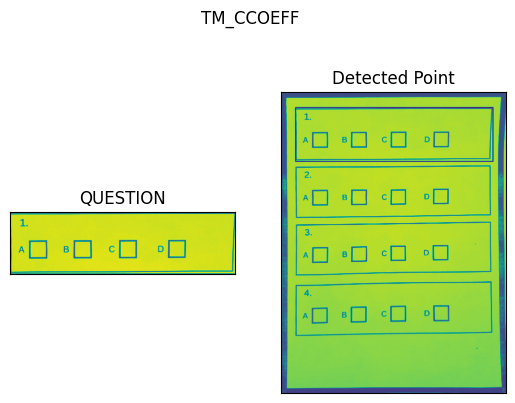

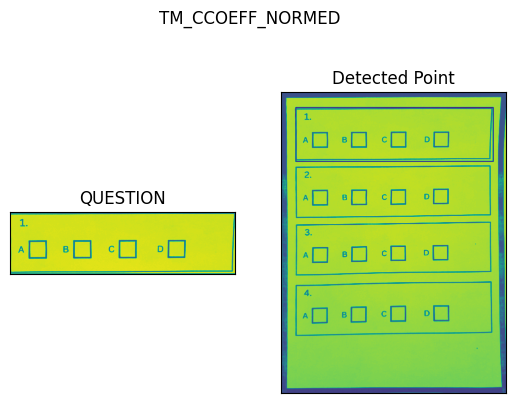

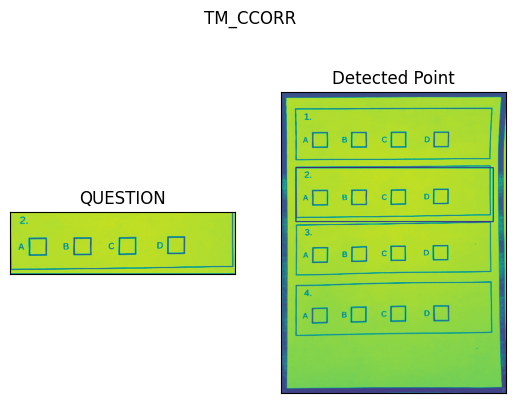

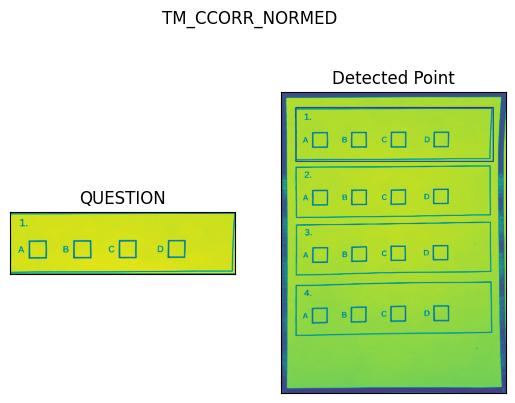

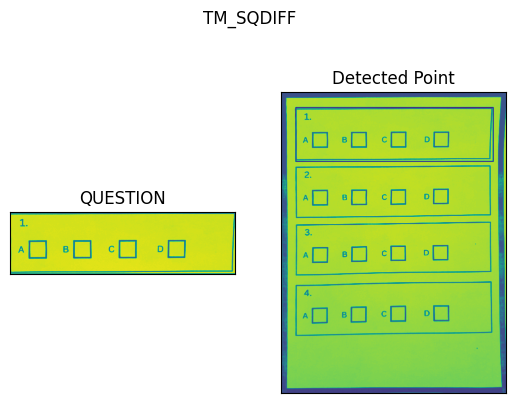

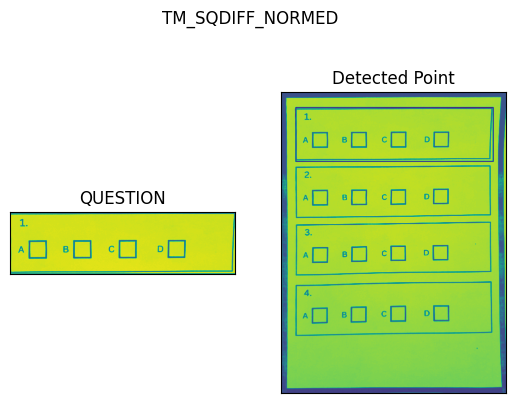

In [27]:
 
img = cv.imread('My_Doc_Examples/sheetA_scanned.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"


img2 = img.copy()
template = cv.imread('My_Doc_Examples/template2.png', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"

w, h = template.shape[::-1]
 
# All the 6 methods for comparison in a list
methods = ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR',
 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']
 
for meth in methods:
 img = img2.copy()
 method = getattr(cv, meth)
 
 # Apply template Matching
 res = cv.matchTemplate(img,template,method)
 min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
 
 # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
 if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    top_left = min_loc
 else:
    top_left = max_loc


 bottom_right = (top_left[0] + w, top_left[1] + h)
 
 cv.rectangle(img,top_left, bottom_right, (0,255,0), 2)

 crop_img = img[top_left[1]:bottom_right[1],  top_left[0]:bottom_right[0]]

 plt.subplot(121),plt.imshow(crop_img)##,cmap = 'gray')
 plt.title('QUESTION'), plt.xticks([]), plt.yticks([])
 
#  plt.subplot(121),plt.imshow(res)##,cmap = 'gray')
#  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
 plt.subplot(122),plt.imshow(img)##,cmap = 'gray')
 plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
 plt.suptitle(meth)
 
 plt.show()

